## Fionas Riddle

Every good story starts with an almighty playground. In this case it are two two-digit numbers (base-10), $a,b \in \{2, 99\}$. The heros of our stories are Gauss and Euler which are given compositions of the two numbers. 

### Gauss: 
$$n_g = a \cdot b$$

### Euler: 
$$n_e = a + b$$

They can't tell each other the number, but they are allowed to communicate. Via the [Theory of (other) minds](https://en.wikipedia.org/wiki/Theory_of_mind) and logic, they are able to deduce the numbers of each other, after following conversation

* Gauss: I don't know the numbers.
* Euler: I knew that you didn't know.
* Gauss: Now I know the numbers.
* Euler: Now I know them too.

## Task 1
When would Gauss know the numbers?

#### Solution
When the product of the two numbers has a unique factorization in two numbers. Note, this does not require them to be prime. For the prime factorization
$$ n_g = \prod_{i=1}^k p_i^{m_i}$$
it is required that 

### Condition 1
* $k\leq 2$
  * Because otherwise, it would always be possible, to find a destinct pair of numbers $a_1, b_1$ and $a_2, b_2$ with $a_1 \neq a_2$, $b_1 \neq b_2$ and also $a_1 \neq b_2$ (swapping would be symmetric, otherwise the riddle will always (unless equal numbers, e.g. 4*4) be a troll).
$$\begin{align*}
    a_1 = p_1^{m_1}, \quad b_1 &= p_2^{m_2} \cdot p_3^{m_3} \\
    a_2 = p_2^{m_2}, \quad b_2 &= p_1^{m_1} \cdot p_3^{m_3} \\
\end{align*}$$
### Condition 2
$m=1$ if $k=2$ 
  * Example, without loss of generality, $m_1 > 1$. If they are the same
$$\begin{align*}
    & a_1 = p_1 \cdot p_2, \quad & b_1 &= p_1^{m_1 -1} \\
    & a_2 = p_1, \quad & b_2 &= p_1^{m_1}
\end{align*}$$
**Careful**:
$a_1 \neq b_2$ is critical. 

It also holds for both $m_1$ and $m_2$ being greater than 1.

### When does Gauss know
So either $n_g$ is the composite of two primes; or a single prime 
* $n_g = p_1 \cdot p_2$
* $n_g = p_1^{m}$

### Think about range
If the number is $9801$ it is obvious, that the numbers are both $99$.So Arguments 1 and 2 only hold if the alternative would be valid.

In [82]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
HIGHEST_NUMBER = 99


def gauss_would_have_known(prime_dict: dict) -> bool:
    if len(prime_dict) == 1:
        return True 
    elif len(prime_dict) == 2:
        if all(v == 1 for v in prime_dict.values()):
            return True
        else:
            return _check_if_there_is_only_one_divide_possible(prime_dict)
    else:
        return False
    
def _check_if_there_is_only_one_divide_possible(prime_dict: dict) -> bool:
    # Check all possible divides (fill in lexicographic order, till "mid" is reached)
    primes = list(prime_dict.keys())
    powers = list(prime_dict.values())
    n = np.prod([primes[i]**powers[i] for i in range(len(primes))])
    divide_counter = 0
    for i in range(len(primes)):
        for j in range(powers[i]):
            a = primes[i]**j * np.prod([primes[k]*powers[k] for k in range(i)])
            b = n/a
            if a <= HIGHEST_NUMBER and b <= HIGHEST_NUMBER:
                divide_counter += 1
            if divide_counter > 1:
                return False
    return True      

factor_list: list[dict] = [sp.factorint(n) for n in range(2, 101)]
gauss_would_have_known_list = []
gauss_unsure_list = []

#### Gauss: Loop over all numbers

In [ ]:
for a in range(2, HIGHEST_NUMBER+1):
    for b in range(a, HIGHEST_NUMBER+1):
        used_primes = set(factor_list[a-2].keys()) | set(factor_list[b-2].keys())
        combined_dict = {k: factor_list[a-2].get(k, 0) + factor_list[b-2].get(k, 0) for k in used_primes}
        # print(f"{a*b} = {a} * {b} = {combined_dict}")
        if gauss_would_have_known(combined_dict):
            gauss_would_have_known_list.append(a*b)
        else:
            gauss_unsure_list.append(a*b)

4 = 2 * 2 = {2: 2}
6 = 2 * 3 = {2: 1, 3: 1}
8 = 2 * 4 = {2: 3}
10 = 2 * 5 = {2: 1, 5: 1}
12 = 2 * 6 = {2: 2, 3: 1}
14 = 2 * 7 = {2: 1, 7: 1}
16 = 2 * 8 = {2: 4}
18 = 2 * 9 = {2: 1, 3: 2}
20 = 2 * 10 = {2: 2, 5: 1}
22 = 2 * 11 = {2: 1, 11: 1}
24 = 2 * 12 = {2: 3, 3: 1}
26 = 2 * 13 = {2: 1, 13: 1}
28 = 2 * 14 = {2: 2, 7: 1}
30 = 2 * 15 = {2: 1, 3: 1, 5: 1}
32 = 2 * 16 = {2: 5}
34 = 2 * 17 = {17: 1, 2: 1}
36 = 2 * 18 = {2: 2, 3: 2}
38 = 2 * 19 = {2: 1, 19: 1}
40 = 2 * 20 = {2: 3, 5: 1}
42 = 2 * 21 = {2: 1, 3: 1, 7: 1}
44 = 2 * 22 = {2: 2, 11: 1}
46 = 2 * 23 = {2: 1, 23: 1}
48 = 2 * 24 = {2: 4, 3: 1}
50 = 2 * 25 = {2: 1, 5: 2}
52 = 2 * 26 = {2: 2, 13: 1}
54 = 2 * 27 = {2: 1, 3: 3}
56 = 2 * 28 = {2: 3, 7: 1}
58 = 2 * 29 = {2: 1, 29: 1}
60 = 2 * 30 = {2: 2, 3: 1, 5: 1}
62 = 2 * 31 = {2: 1, 31: 1}
64 = 2 * 32 = {2: 6}
66 = 2 * 33 = {3: 1, 2: 1, 11: 1}
68 = 2 * 34 = {17: 1, 2: 2}
70 = 2 * 35 = {2: 1, 5: 1, 7: 1}
72 = 2 * 36 = {2: 3, 3: 2}
74 = 2 * 37 = {2: 1, 37: 1}
76 = 2 * 38 = {2: 2, 19: 1}

gauss_would_have_known_list=[4, 6, 8, 10, 14, 16, 22, 26, 32, 34, 38, 46, 58, 62, 64, 74, 82, 86, 94, 106, 118, 122, 128, 134, 142, 146, 158, 166, 178, 194, 9, 15, 21, 27, 33, 39, 51, 57, 69, 81, 87, 93, 111, 123, 129, 141, 159, 177, 183, 201, 213, 219, 237, 243, 249, 267, 291, 16, 32, 64, 128, 212, 236, 244, 256, 268, 284, 292, 316, 332, 356, 388, 25, 35, 55, 65, 85, 95, 115, 125, 145, 155, 185, 205, 215, 235, 265, 295, 305, 335, 355, 365, 395, 415, 445, 485, 49, 77, 91, 119, 133, 161, 203, 217, 259, 287, 301, 329, 343, 371, 413, 427, 469, 497, 511, 553, 581, 623, 679, 64, 128, 256, 424, 472, 488, 512, 536, 568, 584, 632, 664, 712, 776, 81, 243, 333, 369, 387, 423, 477, 531, 549, 603, 639, 657, 711, 729, 747, 801, 873, 500, 121, 143, 187, 209, 242, 253, 319, 341, 363, 407, 451, 473, 484, 517, 583, 649, 671, 737, 781, 803, 869, 913, 968, 979, 1067, 1089, 169, 221, 247, 299, 338, 377, 403, 481, 507, 533, 559, 611, 676, 689, 767, 793, 845, 871, 923, 949, 1027, 1079, 1157, 1261, 1372, 112

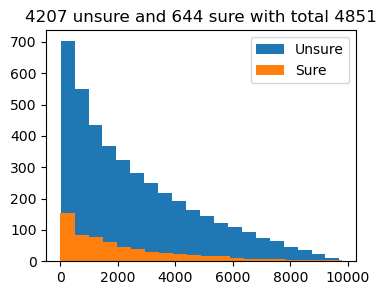

In [84]:
print(f"{gauss_would_have_known_list=}")
print(f"{gauss_unsure_list=}")

fig, ax = plt.subplots(1, 1, figsize=(4,3))
# print(99*98/2+1)
ax.set_title(f"{len(gauss_unsure_list)} unsure and {len(gauss_would_have_known_list)} sure with total {99*49}")
hist1 =ax.hist(gauss_unsure_list, bins=20, label='Unsure')
hist2 = ax.hist(gauss_would_have_known_list, bins=20, label='Sure')
ax.legend()

## What Euler Know

If Euler knows, that Gauss couldn't have known, then all the possible numbers which add up to $n_e$, come from the set of `gauss_unsure_list`
i.e.
$$ \forall_{a,b \in \mathbb{N}} \quad a+b = n_e \Rightarrow a\cdot b \in G_{\text{unsure}}$$

#### Example $n_e = 12$
then 
$$\begin{align*}
    2+10 &= 12 \quad & 2\cdot 10 &= 20 \\
    3+9 &= 12 \quad & 3\cdot 9 &= 27 \\
    4+8 &= 12 \quad & 4\cdot 8 &= 32 \\
    5+7 &= 12 \quad & 5\cdot 7 &= 35 \\
    6+6 &= 12 \quad & 6\cdot 6 &= 36 \\
\end{align*}$$

but since there is a number, which gauss, would have been able to predict, e.g. $n_g = 27$ if $a = 3$ and $b = 9$, this can not be one of Eulers numbers.

In [ ]:
def decompose_number_in_possible_sums(n: int) -> list[tuple[int, int]]:
    possible_sums = []
    for a in range(2, n//2+1):
        b = n - a
        possible_sums.append((a,b))
    return possible_sums

updated_gauss = {}
updated_gauss_original_sum = {}
euler_sure_that_gauss_is_unsure = []

for s in range(4, 198):
    pairs = decompose_number_in_possible_sums(s)
    if all([a*b in gauss_unsure_list for a,b in pairs]):
        euler_sure_that_gauss_is_unsure.append(s)
        print(s, pairs)
        gauss_list = []
        for a,b in pairs:
            updated_gauss[a*b] = updated_gauss.get(a*b, 0) + 1
            gauss_list.append(a*b)
        updated_gauss_original_sum[s] = gauss_list

11 [(2, 9), (3, 8), (4, 7), (5, 6)]
17 [(2, 15), (3, 14), (4, 13), (5, 12), (6, 11), (7, 10), (8, 9)]
23 [(2, 21), (3, 20), (4, 19), (5, 18), (6, 17), (7, 16), (8, 15), (9, 14), (10, 13), (11, 12)]
27 [(2, 25), (3, 24), (4, 23), (5, 22), (6, 21), (7, 20), (8, 19), (9, 18), (10, 17), (11, 16), (12, 15), (13, 14)]
29 [(2, 27), (3, 26), (4, 25), (5, 24), (6, 23), (7, 22), (8, 21), (9, 20), (10, 19), (11, 18), (12, 17), (13, 16), (14, 15)]
35 [(2, 33), (3, 32), (4, 31), (5, 30), (6, 29), (7, 28), (8, 27), (9, 26), (10, 25), (11, 24), (12, 23), (13, 22), (14, 21), (15, 20), (16, 19), (17, 18)]
37 [(2, 35), (3, 34), (4, 33), (5, 32), (6, 31), (7, 30), (8, 29), (9, 28), (10, 27), (11, 26), (12, 25), (13, 24), (14, 23), (15, 22), (16, 21), (17, 20), (18, 19)]
41 [(2, 39), (3, 38), (4, 37), (5, 36), (6, 35), (7, 34), (8, 33), (9, 32), (10, 31), (11, 30), (12, 29), (13, 28), (14, 27), (15, 26), (16, 25), (17, 24), (18, 23), (19, 22), (20, 21)]
47 [(2, 45), (3, 44), (4, 43), (5, 42), (6, 41), (7,

In [91]:
print(euler_sure_that_gauss_is_unsure)
print(updated_gauss_original_sum)

[11, 17, 23, 27, 29, 35, 37, 41, 47, 51, 53, 59]
{11: [18, 24, 28, 30], 17: [30, 42, 52, 60, 66, 70, 72], 23: [42, 60, 76, 90, 102, 112, 120, 126, 130, 132], 27: [50, 72, 92, 110, 126, 140, 152, 162, 170, 176, 180, 182], 29: [54, 78, 100, 120, 138, 154, 168, 180, 190, 198, 204, 208, 210], 35: [66, 96, 124, 150, 174, 196, 216, 234, 250, 264, 276, 286, 294, 300, 304, 306], 37: [70, 102, 132, 160, 186, 210, 232, 252, 270, 286, 300, 312, 322, 330, 336, 340, 342], 41: [78, 114, 148, 180, 210, 238, 264, 288, 310, 330, 348, 364, 378, 390, 400, 408, 414, 418, 420], 47: [90, 132, 172, 210, 246, 280, 312, 342, 370, 396, 420, 442, 462, 480, 496, 510, 522, 532, 540, 546, 550, 552], 51: [98, 144, 188, 230, 270, 308, 344, 378, 410, 440, 468, 494, 518, 540, 560, 578, 594, 608, 620, 630, 638, 644, 648, 650], 53: [102, 150, 196, 240, 282, 322, 360, 396, 430, 462, 492, 520, 546, 570, 592, 612, 630, 646, 660, 672, 682, 690, 696, 700, 702], 59: [114, 168, 220, 270, 318, 364, 408, 450, 490, 528, 564, 598, 

### What Gauss inferes from Eulers Knowledge

[11, 17, 23, 27, 29, 35, 37, 41, 47, 51, 53, 59]

Maybe, the only way to infer something from this is by seeing, that this, limits the number. And therefore if the number is higher, then only e.g. $59$ is possible

In [86]:
# updated_gauss = set(updated_gauss)
print(updated_gauss)
# updated_gauss_list = set(updated_gauss.keys()) 
# print(updated_gauss_list)
unique_values = []
multiple_values = []
for key, value in updated_gauss.items():
    if value == 1:
        unique_values.append(key)
    else:
        multiple_values.append(key)
        

print(f"{np.sort(unique_values)=}")
print(f"{np.sort(multiple_values)=}")
print(f"{updated_gauss_original_sum=}")

{18: 1, 24: 1, 28: 1, 30: 2, 42: 2, 52: 1, 60: 2, 66: 2, 70: 2, 72: 2, 76: 1, 90: 2, 102: 3, 112: 1, 120: 2, 126: 2, 130: 1, 132: 3, 50: 1, 92: 1, 110: 1, 140: 1, 152: 1, 162: 1, 170: 1, 176: 1, 180: 3, 182: 1, 54: 1, 78: 2, 100: 1, 138: 1, 154: 1, 168: 2, 190: 1, 198: 1, 204: 1, 208: 1, 210: 4, 96: 1, 124: 1, 150: 2, 174: 1, 196: 2, 216: 1, 234: 1, 250: 1, 264: 2, 276: 1, 286: 2, 294: 1, 300: 2, 304: 1, 306: 1, 160: 1, 186: 1, 232: 1, 252: 1, 270: 3, 312: 2, 322: 2, 330: 2, 336: 1, 340: 1, 342: 2, 114: 2, 148: 1, 238: 1, 288: 1, 310: 1, 348: 1, 364: 2, 378: 2, 390: 1, 400: 1, 408: 2, 414: 1, 418: 1, 420: 2, 172: 1, 246: 1, 280: 1, 370: 1, 396: 2, 442: 1, 462: 2, 480: 1, 496: 1, 510: 1, 522: 1, 532: 1, 540: 2, 546: 2, 550: 1, 552: 1, 98: 1, 144: 1, 188: 1, 230: 1, 308: 1, 344: 1, 410: 1, 440: 1, 468: 1, 494: 1, 518: 1, 560: 1, 578: 1, 594: 1, 608: 1, 620: 1, 630: 3, 638: 1, 644: 1, 648: 1, 650: 1, 240: 1, 282: 1, 360: 1, 430: 1, 492: 1, 520: 1, 570: 1, 592: 1, 612: 1, 646: 1, 660: 2, 6

In [89]:

cleared_list_per_sum = {}
for k, v_list in updated_gauss_original_sum.items():
    for v in v_list:
        if v in unique_values:
            cleared_list_per_sum[k] = cleared_list_per_sum.get(k, []) + [v]
print(cleared_list_per_sum)

{11: [18, 24, 28], 17: [52], 23: [76, 112, 130], 27: [50, 92, 110, 140, 152, 162, 170, 176, 182], 29: [54, 100, 138, 154, 190, 198, 204, 208], 35: [96, 124, 174, 216, 234, 250, 276, 294, 304, 306], 37: [160, 186, 232, 252, 336, 340], 41: [148, 238, 288, 310, 348, 390, 400, 414, 418], 47: [172, 246, 280, 370, 442, 480, 496, 510, 522, 532, 550, 552], 51: [98, 144, 188, 230, 308, 344, 410, 440, 468, 494, 518, 560, 578, 594, 608, 620, 638, 644, 648, 650], 53: [240, 282, 360, 430, 492, 520, 570, 592, 612, 646, 672, 682, 690, 696, 700, 702], 59: [220, 318, 450, 490, 528, 564, 598, 688, 714, 738, 760, 780, 798, 814, 828, 840, 850, 858, 864, 868, 870]}


In [90]:
# Convert the dictionary to a pandas DataFrame
df_cleared_list_per_sum = pd.DataFrame.from_dict(cleared_list_per_sum, orient='index')

# Display the DataFrame as a table
df_cleared_list_per_sum

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
11,18,24.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,76,112.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,50,92.0,110.0,140.0,152.0,162.0,170.0,176.0,182.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,54,100.0,138.0,154.0,190.0,198.0,204.0,208.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,96,124.0,174.0,216.0,234.0,250.0,276.0,294.0,304.0,306.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,160,186.0,232.0,252.0,336.0,340.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,148,238.0,288.0,310.0,348.0,390.0,400.0,414.0,418.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,172,246.0,280.0,370.0,442.0,480.0,496.0,510.0,522.0,532.0,...,552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,98,144.0,188.0,230.0,308.0,344.0,410.0,440.0,468.0,494.0,...,560.0,578.0,594.0,608.0,620.0,638.0,644.0,648.0,650.0,NaN


### Eulers final induction

For Euler it would only be clear if there would be a single number left. Which is the case for $n_e = 17$ which relates to $n_g = 52$. 

So with this at hand euler can solve the system of equations 
$$\begin{align}
    a+b &= 17 \\
    a\cdot b &= 52
\end{align}$$

yielding $a=4$ and $b=13$ or $a=13$ and $b=4$.